# 5964_MLinEDU TA Lecture 3: Logistic Regression, Supporting Vector Machine and K Nearest Neighbor
Teacher: Chun-Shu Wei  
Teaching Assistant: 劉昱劭,Min-Jiun Tsai
## Important Packages we use
1. matplotlib.pyplot
2. mpl_toolkits.mplot3d
3. sklearn.datasets
4. sklearn.decomposition
5. pandas.DataFrame
6. sklearn.linear_model
7. sklearn.svm
8. sklearn.neighbors
9. numpy

## Dataset: Iris in sklearn dataset 
### Task 1: How to read and organize data loaded from sklearn.datasets?

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
# import iris dataset from sklearn.datasets
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Q: What kind of data type iris dataset is? 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
import pandas as pd
iris=pd.DataFrame(iris)
iris

ValueError: arrays must all be same length

In [6]:
print('Iris dataset contains {} data.'.format(len(iris['data'])))
print('There are 4 attributes:',iris['feature_names'])
print('Iris dataset contains {} label.'.format(len(iris['target'])))
print('There are 3 values in label:',list(set(iris['target'])))
print('Which means classes:',iris['target_names'])

Iris dataset contains 150 data.
There are 4 attributes: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris dataset contains 150 label.
There are 3 values in label: [0, 1, 2]
Which means classes: ['setosa' 'versicolor' 'virginica']


In [7]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [8]:
type(iris['DESCR'])

str

In [9]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
iris['filename']

'C:\\Users\\admin\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

### Organize iris dataset into pd.DataFrame 

In [11]:
iris_df=pd.DataFrame(data=iris['data'],columns=['sepal length','sepal width','petal length','petal width'])
iris_df['label']=iris.target
iris_df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [12]:
iris_data=iris_df[['sepal length','sepal width','petal length','petal width']]
iris_label=iris_df['label']
iris_data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
corr = iris_df.corr()
corr

,sepal length,sepal width,petal length,petal width,label
sepal length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal width,0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


### Task 2: How does iris dataset look like?
sklearn.decomposition.PCA:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

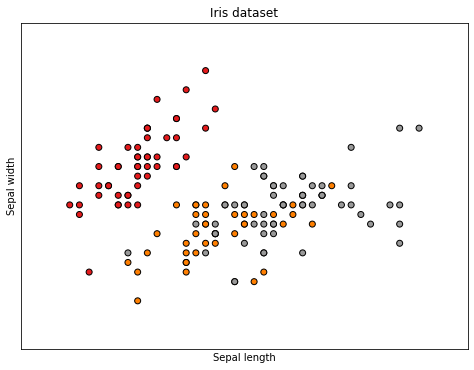

In [15]:
x_min, x_max = iris_df['sepal length'].min() - .5, iris_df['sepal length'].max() + .5
y_min, y_max = iris_df['sepal width'].min() - .5, iris_df['sepal width'].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(iris_df['sepal length'], iris_df['sepal width'], c=iris_df['label'], cmap=plt.cm.Set1,
            edgecolor='k')
plt.title('Iris dataset')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

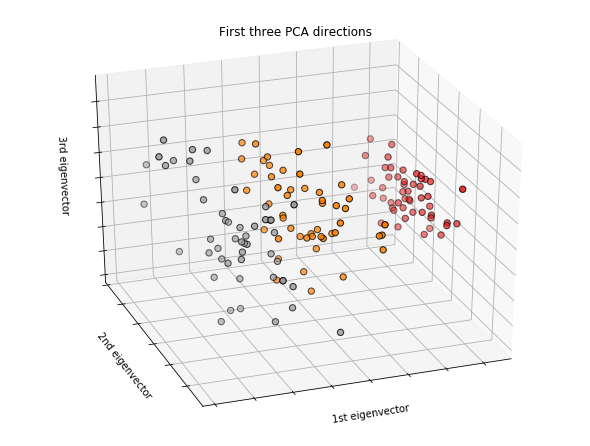

In [16]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],c=iris.target,
           cmap=plt.cm.Set1, edgecolor='k',s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

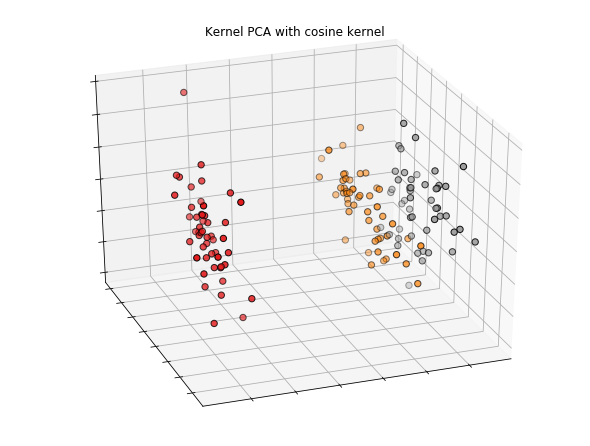

In [17]:
from sklearn.decomposition import KernelPCA
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = KernelPCA(n_components=3, kernel='cosine').fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],c=iris.target,
           cmap=plt.cm.Set1, edgecolor='k',s=40)
ax.set_title("Kernel PCA with cosine kernel")

ax.w_xaxis.set_ticklabels([])

ax.w_yaxis.set_ticklabels([])

ax.w_zaxis.set_ticklabels([])
plt.show()

## Logistic Regression

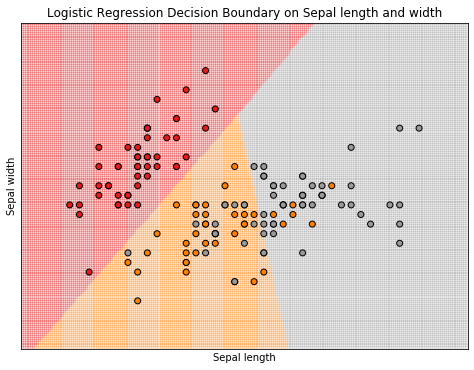

In [18]:
from sklearn.linear_model import LogisticRegression
import numpy as np

LR = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
LR.fit(iris_df[['sepal length','sepal width']], iris_df['label'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = iris_df['sepal length'].min() - .5, iris_df['sepal length'].max() + .5
y_min, y_max = iris_df['sepal width'].min() - .5, iris_df['sepal width'].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.title('Logistic Regression Decision Boundary on Sepal length and width')
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set1,alpha=0.2)

# Plot also the training points
plt.scatter(iris_df['sepal length'], iris_df['sepal width'], c=iris_df['label'], edgecolors='k', cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Supporting Vector Machine

In [19]:
from sklearn import svm

In [20]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - .5, x.max() + .5
    y_min, y_max = y.min() - .5, y.max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [21]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

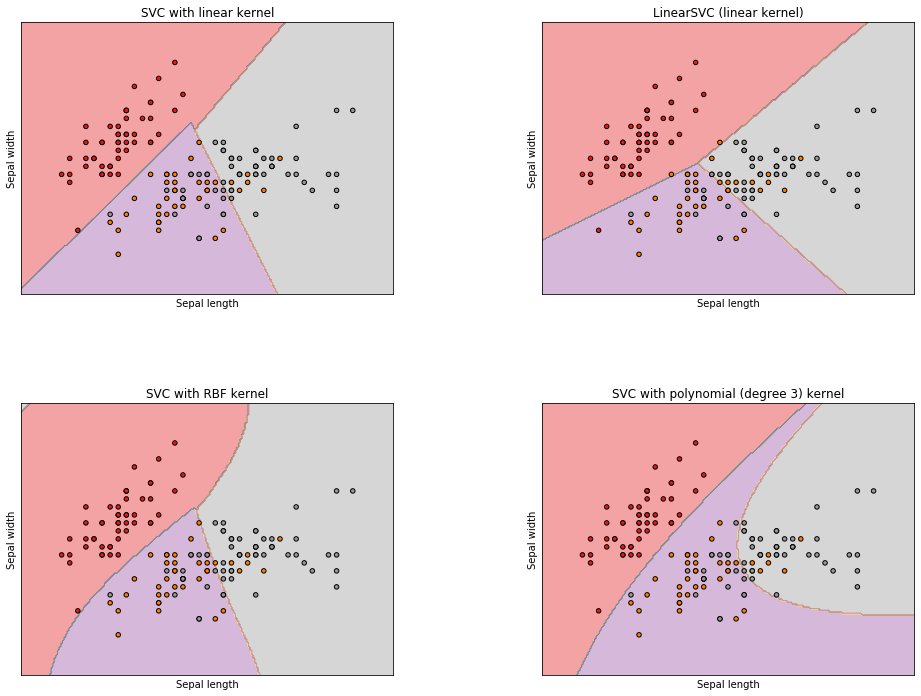

In [24]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(iris_df[['sepal length','sepal width']], iris_df['label']) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(16,12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

xx, yy = make_meshgrid(iris_df['sepal length'], iris_df['sepal width'])

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.Set1, alpha=0.4)
    ax.scatter(iris_df['sepal length'], iris_df['sepal width'], c=iris_df['label'], cmap=plt.cm.Set1, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## K Nearest Neighhbor

In [25]:
import numpy as np
from sklearn import neighbors
# Prepare data for training - only use sepal length and width

x_min, x_max = iris_df['sepal length'].min()-.5, iris_df['sepal length'].max()+.5
y_min, y_max = iris_df['sepal width'].min()-.5, iris_df['sepal width'].max()+.5

# Setup color meshgrid
step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [26]:
# Run KNN supervised classifier
n_neighbors = 15     # default is 5
weights = 'uniform'  # default, to try 'distance'
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
knn.fit(iris_df[['sepal length','sepal width']], iris_df['label'])       # Features and target
# Run prediction on all points on the meshgrid
z_predict = knn.predict(np.c_[xx.ravel(), yy.ravel()])  # column stack
z_predict = z_predict.reshape(xx.shape)  # back to 2D

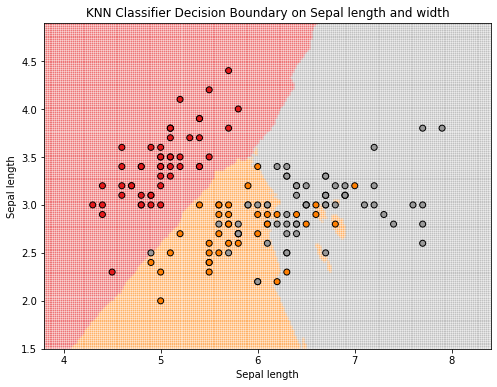

In [28]:
plt.figure(1, figsize=(8, 6))
# Plot color mesh on prediction (decision boundary)
plt.pcolormesh(xx, yy, z_predict, cmap=plt.cm.Set1,alpha=0.2)

#cmap_rgb_dark = ListedColormap(['#FF4444','#44FF44','#4444FF'])  # darker
plt.scatter(iris_df['sepal length'], iris_df['sepal width'], c=iris_df['label'], cmap=plt.cm.Set1, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal length')
plt.ylabel('Sepal length')
plt.title('KNN Classifier Decision Boundary on Sepal length and width')
plt.show()